## Testing GeoTrans2

In [1]:
%load_ext autoreload
%autoreload 2
from geotrans2 import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = RingedSystem()
S

Star primary:
	 Ms = 1.988550e+30 kg
	 Rs = 6.963420e+08 kg
Planet primary:
	 Mp = 5.684600e+26 kg = 2.858666e-04 Mstar
	 Rp = 5.823200e+07 kg = 8.362557e-02 Rstar
Rings primary:
	 fi,fe = 1.579887e+00,2.348794e+00 Rp
	 Inclination (orbit) = 45.0 deg
	 Roll (orbit) = 45.0 deg
	 Opacity = 1.00
Orbit primary:
	 ap = 1.495979e+11 km = 1.000000e+00 AU = 2.148339e+02 Rstar
	 Eccentricity = 0.00
	 Inclination (visual) = 90.00 deg
	 Periapsis argument = 0.00 deg

Planetary derivative:
	 Radius (relative) = 8.362557e-02 Rstar
Rings derivative:
	 Internal ring (relative) = 0.13 Rstar
	 External ring (relative) = 0.20 Rstar
	 Apparent inclination = 60.00 deg
	 Apparent roll = 35.26 deg
Orbit derivative:
	 Period = 3.155257e+07 s = 8.764604e+03 h = 3.651918e+02 d = 1.000526e+00 yr
	 Mean Angular velocity = 1.991338e-07 rad/s = 4.278070e-05 Rstar/s = 5.115744e-04 Rp/s
	 Central true anomaly = 2.700000e+02 deg
	 Central eccentric anomaly = -9.000000e+01 deg
	 Central mean anomaly = -9.000000e+01 de

### Checking dependency on angles

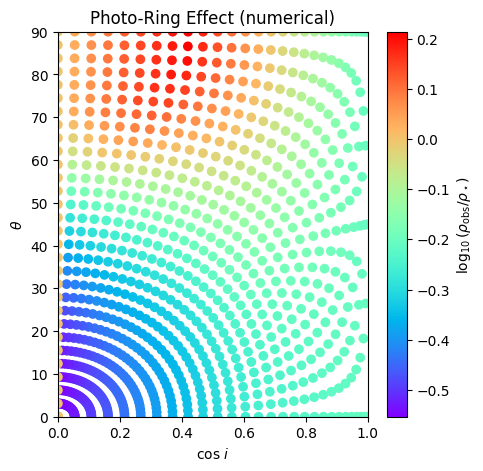

In [4]:
N1 = 30
irs = np.linspace(0,90,N1)*DEG
N2 = 30
phirs = np.linspace(0,90,N2)*DEG
IR,PHIR = np.meshgrid(irs,phirs)

cieffs = []
teffs = []
PRs = []
PRcs = np.zeros((N2,N1))
for i,ir in enumerate(irs):
    S.ir = ir
    for j,phir in enumerate(phirs):
        S.phir = phir
        
        S.calculate_PR()

        cieffs.append(np.cos(S.ieff))
        teffs.append(S.teff*RAD)
        PRs.append(S.PR)
        PRcs[j,i] = S.PR

fig,axs = plt.subplots(1,1,figsize=(5,5))
ax = axs
ax.scatter(cieffs, teffs, c=PRs, cmap='rainbow')
cbar = fig.colorbar(ax.collections[0], ax=ax)

# Decoration
ax.set_title("Photo-Ring Effect (numerical)",position=(0.5,1.02))
ax.set_xlabel(r"$\cos\,i$")
ax.set_ylabel(r"$\theta$")
cbar.ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")
ax.margins(0)

Text(0, 0.5, '$\\phi_R$ (deg)')

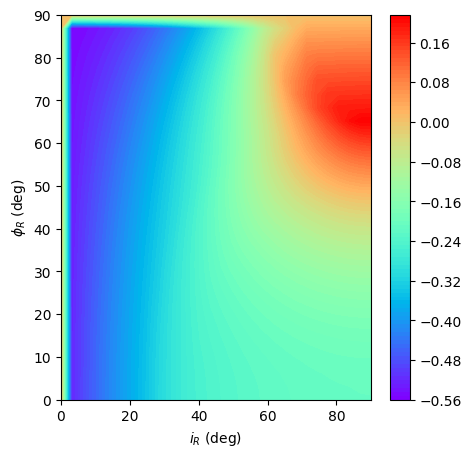

In [5]:
fig,axs = plt.subplots(1,1,figsize=(5,5))
ax = axs
c = ax.contourf(IR*RAD, PHIR*RAD, PRcs,levels=100,cmap='rainbow')
cbar = fig.colorbar(c, ax=ax)
ax.set_xlabel(r"$i_R$ (deg)")
ax.set_ylabel(r"$\phi_R$ (deg)")


### Draws as curves

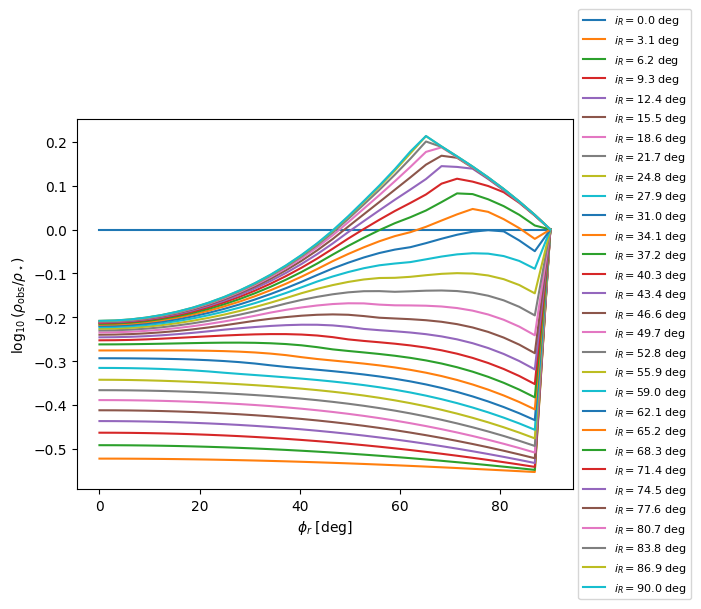

In [7]:
fig,axs = plt.subplots(1,1)
ax = axs
for j,ir in enumerate(irs):
    ax.plot(phirs*RAD, PRcs[:,j], label=rf"$i_{{R}}={ir*RAD:.1f}$ deg")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
ax.set_xlabel(r"$\phi_r$ [deg]")
ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")

plt.show()

### Studying dependence on different parameters

0.02256971206032486 15.156424580310057
0.03470172305146331 15.156424580310057
0.041876590862261275 15.156424580310057
0.046119805621959914 15.156424580310057
0.04862924161042893 15.156424580310057
0.05011332133225539 15.156424580310057
0.05099100565289839 15.156424580310057
0.05151006790769054 15.156424580310057
0.05181704117588397 15.156424580310057
0.05199858507840312 15.156424580310057
0.052105950090138006 15.156424580310057
0.05216944572719811 15.156424580310057
0.052206997028693095 15.156424580310057
0.05222920485759687 15.156424580310057
0.052242338561223234 15.156424580310057
0.052250105829770396 15.156424580310057
0.0522546993901552 15.156424580310057
0.05225741602044559 15.156424580310057
0.05225902263481798 15.156424580310057
0.052259972786095725 15.156424580310057


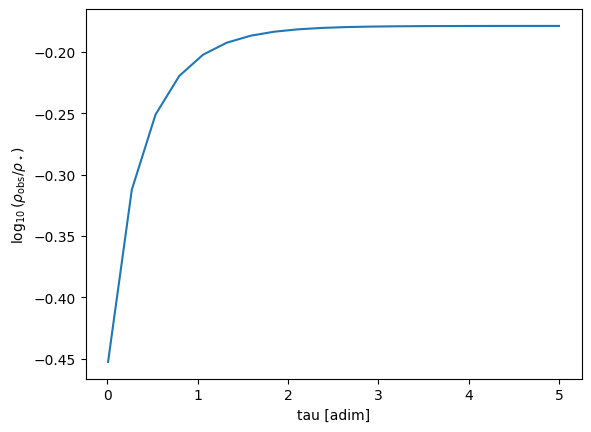

In [10]:
parameter='tau'
norm = 1,'adim'
range = 1e-2, 5
Np = 20

S = RingedSystem()
pars = np.linspace(range[0],range[1],Np)*norm[0]
PRs = []
for par in pars:
    S.__dict__[parameter] = par
    S.updateSystem()
  
    S.calculate_PR()

    print(S.Ar,S.tT)

    PRs.append(S.PR)

fig,axs = plt.subplots(1,1)
ax = axs
ax.plot(pars/norm[0], PRs)
ax.set_xlabel(rf"{parameter} [{norm[1]}]")
ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")

plt.show()


0.048161846484787614 15.156424580310057
0.053364926852950245 15.268664594934219
0.05883483185537767 15.380722405940501
0.06457156149206986 15.49260017843089
0.07057511576302675 15.60430005266952
0.07684549466824836 15.715824144383788
0.08338269820773485 15.827174545058515
0.09018672638148599 15.938353322219983
0.09725757918950184 16.049362519713533
0.10459525663178251 16.16020415797157
0.11219975870832793 16.27088023427822
0.12007108541913812 16.38139272302027
0.128209236764213 16.491743575940426
0.13661421274355273 16.601934722378694
0.14528601335715718 16.71196806951064
0.15422463860502633 16.821845502578395
0.16343008848716026 16.931568885118338
0.1729023630035589 17.041140059183558
0.18264146215422222 17.150560845562204
0.19264738593915046 17.259833043991176


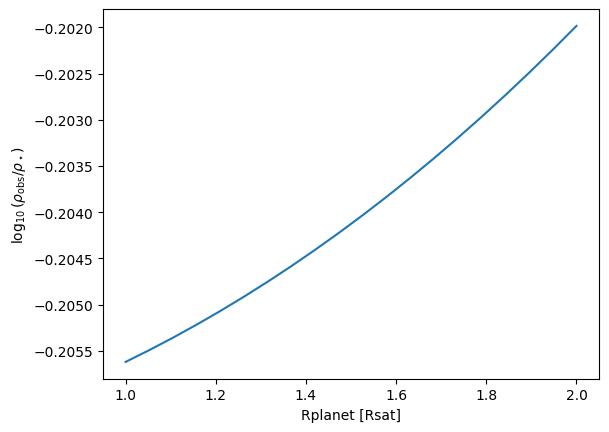

In [11]:
parameter='Rplanet'
norm = RSAT,'Rsat'
range = 1, 2
Np = 20

S = RingedSystem()
pars = np.linspace(range[0],range[1],Np)*norm[0]
PRs = []
for par in pars:
    S.__dict__[parameter] = par
    S.updateSystem()
  
    S.calculate_PR()

    print(S.Ar,S.tT)

    PRs.append(S.PR)

fig,axs = plt.subplots(1,1)
ax = axs
ax.plot(pars/norm[0], PRs)
ax.set_xlabel(rf"{parameter} [{norm[1]}]")
ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")

plt.show()


0.048161846484787614 15.156424580310057
0.04346606645252083 15.84171967484445
0.03942500358505291 16.526855462146663
0.03592236896902548 17.21185240266586
0.03286659089037493 17.89672763333656
0.030184768369806145 18.581495616521117
0.02781828252961334 19.26616864279042
0.025719565948237183 19.950757224520203
0.023849693526760404 20.635270406962373
0.02217656451659226 21.319716016284914
0.02067351555411217 22.004100858974528
0.01931825175667593 22.68843088337039
0.018092015172745397 23.372711311456644
0.016978932208015947 24.056946747104327
0.015965497319566882 24.74114126552957
0.01504016140225635 25.425298487660992
0.014193001290619046 26.109421642303673
0.013415452608802732 26.793513618373417
0.012700092462387394 27.477577008998747
0.012040461621196904 28.16161414893758


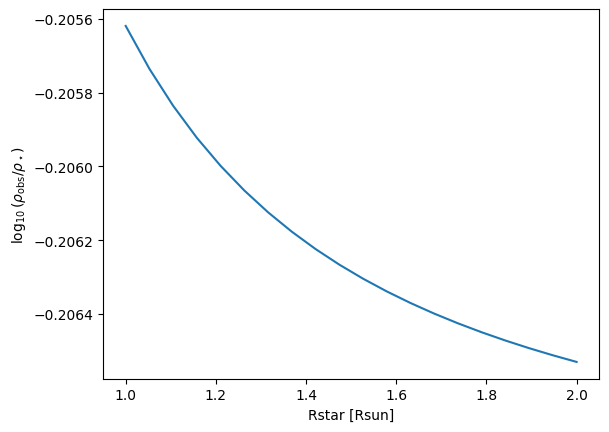

In [12]:
parameter='Rstar'
norm = RSUN,'Rsun'
range = 1, 2
Np = 20

S = RingedSystem()
pars = np.linspace(range[0],range[1],Np)*norm[0]
PRs = []
for par in pars:
    S.__dict__[parameter] = par
    S.updateSystem()
  
    S.calculate_PR()

    print(S.Ar,S.tT)

    PRs.append(S.PR)

fig,axs = plt.subplots(1,1)
ax = axs
ax.plot(pars/norm[0], PRs)
ax.set_xlabel(rf"{parameter} [{norm[1]}]")
ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")

plt.show()


0.02258911843657137 14.24710557809384
0.023452682443642715 14.40146910401113
0.02459746787277561 14.555726711810049
0.026008558079727677 14.709878632720663
0.02767921049241441 14.863925095540989
0.029606242297397292 15.01786632667606
0.031788347589405075 15.171702550165355
0.03422535108147279 15.325433987720817
0.03691784094756198 15.479060858756355
0.039866981606443155 15.63258338042095
0.043074424551019314 15.786001767629706
0.04654228167978557 15.939316233096696
0.050273147630696485 16.092526987363428
0.054270171499276744 16.24563423883325
0.0585371919383893 16.39863819379696
0.0630789706973769 16.55153905646539
0.0679016037583566 16.704337029000225
0.07301330301158239 16.857032311538546
0.07842610872331393 17.00962510222621
0.0841607832927923 17.162115597245023


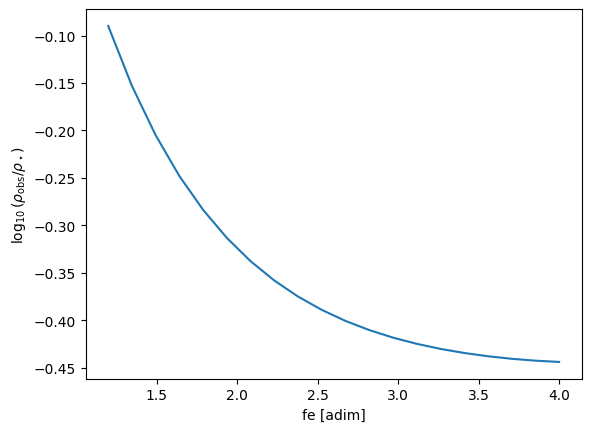

In [13]:
parameter='fe'
norm = 1,'adim'
range = 1.2, 4
Np = 20

S = RingedSystem()
S.fi = 1
S.tau = 1
S.ir = 20*DEG

pars = np.linspace(range[0],range[1],Np)*norm[0]
PRs = []
for par in pars:
    S.__dict__[parameter] = par
    S.updateSystem()
  
    S.calculate_PR()

    print(S.Ar,S.tT)

    PRs.append(S.PR)

fig,axs = plt.subplots(1,1)
ax = axs
ax.plot(pars/norm[0], PRs)
ax.set_xlabel(rf"{parameter} [{norm[1]}]")
ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")

plt.show()


### Studying dependence on multiparameter

Text(0, 0.5, '$fe$ (deg)')

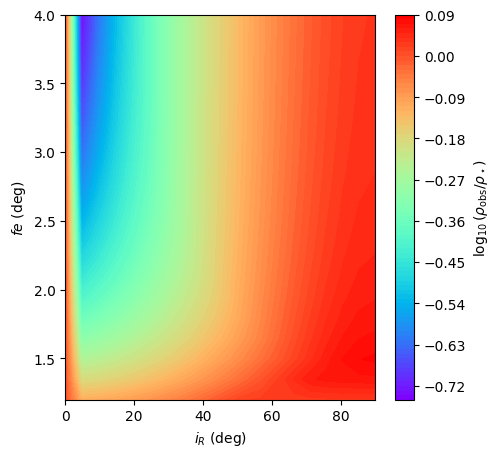

In [14]:
N1 = 20
irs = np.linspace(0,90,N1)*DEG
N2 = 20
fes = np.linspace(1.2,4,N2)
IR,FE = np.meshgrid(irs,fes)

S = RingedSystem()
S.fi = 1

PRcs = np.zeros((N2,N1))
for i,ir in enumerate(irs):
    S.ir = ir
    
    for j,fe in enumerate(fes):
        S.fe = fe
        
        S.calculate_PR()

        PRcs[j,i] = S.PR

fig,axs = plt.subplots(1,1,figsize=(5,5))
ax = axs
c = ax.contourf(IR*RAD, FE, PRcs,levels=100,cmap='rainbow')
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")
ax.set_xlabel(r"$i_R$ (deg)")
ax.set_ylabel(r"$fe$ (deg)")

#### General

Text(0, 0.5, 'phir [deg]')

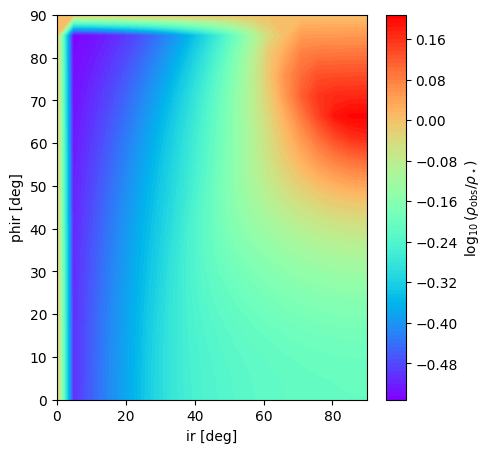

In [16]:
N1 = 20
par1_name = 'ir'
par1_units = 'deg',DEG
par1_range = 0, 90

N2 = 20
par2_name = 'phir'
par2_units = 'deg',DEG
par2_range = 0, 90

System = dict()

par1s = np.linspace(par1_range[0],par1_range[1],N1)*par1_units[1]
par2s = np.linspace(par2_range[0],par2_range[1],N1)*par2_units[1]
PAR1,PAR2 = np.meshgrid(par1s,par2s)

S = RingedSystem(system=System)
PRcs = np.zeros((N2,N1))
for i,par1 in enumerate(par1s):
    S.__dict__[par1_name] = par1
    
    for j,par2 in enumerate(par2s):
        S.__dict__[par2_name] = par2
    
        S.updateSystem()        
        S.calculate_PR()

        PRcs[j,i] = S.PR

fig,axs = plt.subplots(1,1,figsize=(5,5))
ax = axs
c = ax.contourf(PAR1/par1_units[1], PAR2/par2_units[1], PRcs, levels=100, cmap='rainbow')
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")
ax.set_xlabel(rf"{par1_name} [{par1_units[0]}]")
ax.set_ylabel(rf"{par2_name} [{par2_units[0]}]")

Text(0, 0.5, 'fe [adim]')

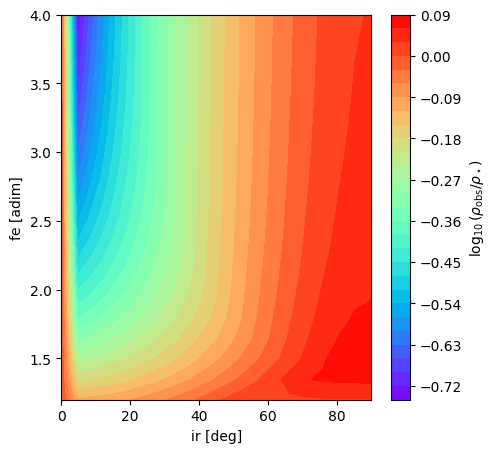

In [17]:
N1 = 20
par1_name = 'ir'
par1_units = 'deg',DEG
par1_range = 0, 90

N2 = 20
par2_name = 'fe'
par2_units = 'adim',1
par2_range = 1.2, 4

System = dict(fi=1)

par1s = np.linspace(par1_range[0],par1_range[1],N1)*par1_units[1]
par2s = np.linspace(par2_range[0],par2_range[1],N1)*par2_units[1]
PAR1,PAR2 = np.meshgrid(par1s,par2s)

S = RingedSystem(system=System)
PRcs = np.zeros((N2,N1))
for i,par1 in enumerate(par1s):
    S.__dict__[par1_name] = par1
    
    for j,par2 in enumerate(par2s):
        S.__dict__[par2_name] = par2
    
        S.updateSystem()        
        S.calculate_PR()

        PRcs[j,i] = S.PR

fig,axs = plt.subplots(1,1,figsize=(5,5))
ax = axs
c = ax.contourf(PAR1/par1_units[1], PAR2/par2_units[1], PRcs, levels=30, cmap='rainbow')
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")
ax.set_xlabel(rf"{par1_name} [{par1_units[0]}]")
ax.set_ylabel(rf"{par2_name} [{par2_units[0]}]")

Text(0, 0.5, 'Rplanet [Rsat]')

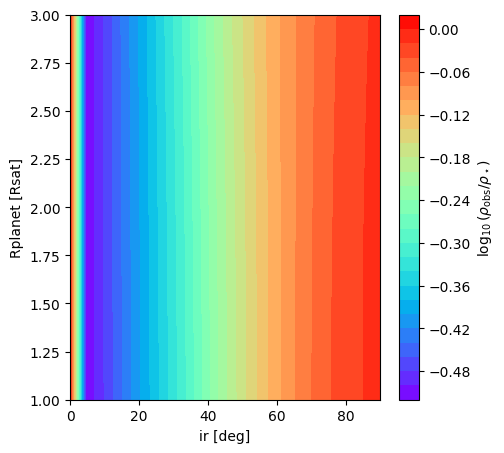

In [18]:
N1 = 20
par1_name = 'ir'
par1_units = 'deg',DEG
par1_range = 0, 90

N2 = 20
par2_name = 'Rplanet'
par2_units = 'Rsat',RSAT
par2_range = 1, 3

System = dict()

par1s = np.linspace(par1_range[0],par1_range[1],N1)*par1_units[1]
par2s = np.linspace(par2_range[0],par2_range[1],N1)*par2_units[1]
PAR1,PAR2 = np.meshgrid(par1s,par2s)

S = RingedSystem(system=System)
PRcs = np.zeros((N2,N1))
for i,par1 in enumerate(par1s):
    S.__dict__[par1_name] = par1
    
    for j,par2 in enumerate(par2s):
        S.__dict__[par2_name] = par2
    
        S.updateSystem()        
        S.calculate_PR()

        PRcs[j,i] = S.PR

fig,axs = plt.subplots(1,1,figsize=(5,5))
ax = axs
c = ax.contourf(PAR1/par1_units[1], PAR2/par2_units[1], PRcs, levels=30, cmap='rainbow')
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")
ax.set_xlabel(rf"{par1_name} [{par1_units[0]}]")
ax.set_ylabel(rf"{par2_name} [{par2_units[0]}]")

Grazing configuration.


Text(0, 0.5, 'Rplanet [Rsat]')

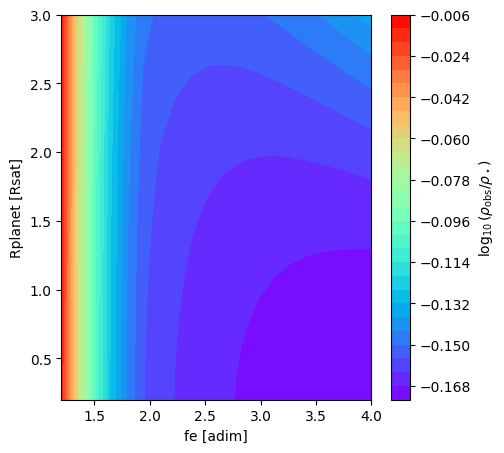

In [21]:
N1 = 20
par1_name = 'fe'
par1_units = 'adim',1
par1_range = 1.2,4

N2 = 20
par2_name = 'Rplanet'
par2_units = 'Rsat',RSAT
par2_range = 0.2, 3

System = dict(fi=1.1)

par1s = np.linspace(par1_range[0],par1_range[1],N1)*par1_units[1]
par2s = np.linspace(par2_range[0],par2_range[1],N1)*par2_units[1]
PAR1,PAR2 = np.meshgrid(par1s,par2s)

S = RingedSystem(system=System)
PRcs = np.zeros((N2,N1))
for i,par1 in enumerate(par1s):
    S.__dict__[par1_name] = par1
    
    for j,par2 in enumerate(par2s):
        S.__dict__[par2_name] = par2
    
        S.updateSystem()        
        S.calculate_PR()

        PRcs[j,i] = S.PR

fig,axs = plt.subplots(1,1,figsize=(5,5))
ax = axs
c = ax.contourf(PAR1/par1_units[1], PAR2/par2_units[1], PRcs, levels=30, cmap='rainbow')
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel(r"$\log_{10}(\rho_{\rm obs}/\rho_\star)$")
ax.set_xlabel(rf"{par1_name} [{par1_units[0]}]")
ax.set_ylabel(rf"{par2_name} [{par2_units[0]}]")